# **🧪 Assignment 2: Multi-Class Classification using Neural Network with 3 Hidden Layers**

## Step 1: Import Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns


## Step 2: Generate Synthetic Dataset (5 Classes)

We used make_classification to generate 1000 samples with 10 features and 5 output classes. Labels are one-hot encoded for multi-class learning (e.g., [0, 0, 1, 0, 0]). The dataset is then split into training and testing sets (80/20).

In [8]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=8,
                           n_redundant=2, n_classes=5, random_state=42)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


## Step 3: Activation and Utility Functions

**These are the activation functions:**

**1. ReLU:** For hidden layers — introduces non-linearity.

**2. Softmax:** For the output layer — transforms outputs into probability distributions across 5 classes.

**3. Cross-Entropy Loss:** Measures how well the predicted class probabilities match the true labels.

In [9]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m


## Step 4: Neural Network Class with 3 Hidden Layers

**Initializes weights and biases for:**

Input → Hidden Layer 1

Hidden 1 → Hidden 2

Hidden 2 → Hidden 3

Hidden 3 → Output Layer

**➕ forward:**
Performs forward propagation:

Input → ReLU → Hidden 1

Hidden 1 → ReLU → Hidden 2

Hidden 2 → ReLU → Hidden 3

Hidden 3 → Softmax → Output (class probabilities)

**🔁 backward:**
Backpropagation using chain rule:

Gradients of loss are computed layer by layer

Derivatives of ReLU and Softmax applied

All weights and biases updated using learning rate

**🧪 train:**
Trains the model over multiple epochs

Stores loss for plotting later

**🔮 predict:**
Converts final softmax probabilities to class labels using argmax

In [10]:
class NeuralNetwork:
    def __init__(self, input_dim, hidden1, hidden2, hidden3, output_dim, learning_rate=0.01):
        self.lr = learning_rate
        self.W1 = np.random.randn(input_dim, hidden1) * 0.01
        self.b1 = np.zeros((1, hidden1))
        self.W2 = np.random.randn(hidden1, hidden2) * 0.01
        self.b2 = np.zeros((1, hidden2))
        self.W3 = np.random.randn(hidden2, hidden3) * 0.01
        self.b3 = np.zeros((1, hidden3))
        self.W4 = np.random.randn(hidden3, output_dim) * 0.01
        self.b4 = np.zeros((1, output_dim))

    def forward(self, X):
        self.Z1 = X.dot(self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = self.A1.dot(self.W2) + self.b2
        self.A2 = relu(self.Z2)
        self.Z3 = self.A2.dot(self.W3) + self.b3
        self.A3 = relu(self.Z3)
        self.Z4 = self.A3.dot(self.W4) + self.b4
        self.A4 = softmax(self.Z4)
        return self.A4

    def backward(self, X, Y, output):
        m = Y.shape[0]
        dZ4 = output - Y
        dW4 = self.A3.T.dot(dZ4) / m
        db4 = np.sum(dZ4, axis=0, keepdims=True) / m

        dA3 = dZ4.dot(self.W4.T)
        dZ3 = dA3 * relu_derivative(self.Z3)
        dW3 = self.A2.T.dot(dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        dA2 = dZ3.dot(self.W3.T)
        dZ2 = dA2 * relu_derivative(self.Z2)
        dW2 = self.A1.T.dot(dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dA1 = dZ2.dot(self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = X.T.dot(dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights and biases
        self.W4 -= self.lr * dW4
        self.b4 -= self.lr * db4
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def train(self, X, Y, epochs=200):
        losses = []
        for i in range(epochs):
            output = self.forward(X)
            loss = cross_entropy(Y, output)
            losses.append(loss)
            self.backward(X, Y, output)
        return losses

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)


## Step 5: Train the Neural Network

*   64, 32, and 16 neurons respectively
*   Trained for 500 epochs
*   Learning rate = 0.05

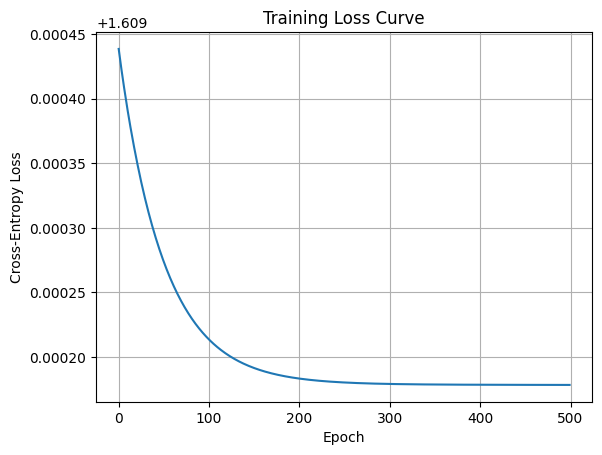

In [11]:
nn = NeuralNetwork(input_dim=10, hidden1=64, hidden2=32, hidden3=16, output_dim=5, learning_rate=0.05)
losses = nn.train(X_train, y_train, epochs=500)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()


## Step 6: Evaluate the Model

### Here:
*   y_pred: predicted class labels
*   y_true: actual class labels from one-hot vectors


*   **Precision:** how many predicted labels were correct
*   **Recall:** how many actual labels were found
*   **F1-score:** harmonic mean of precision and recall
*   Scores for each of the 5 classes, plus macro/micro averages

*   **Confusion Matrix:** This matrix compares actual vs predicted classes to reveal where the model makes mistakes.



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.17      1.00      0.30        35
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        37

    accuracy                           0.17       200
   macro avg       0.03      0.20      0.06       200
weighted avg       0.03      0.17      0.05       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


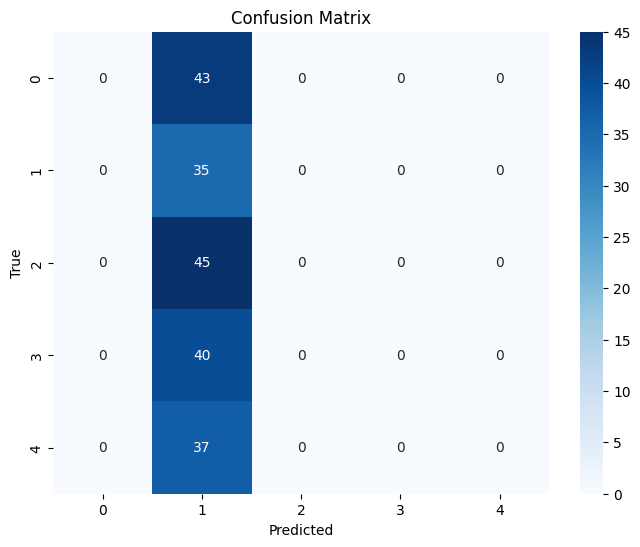

In [12]:
y_pred = nn.predict(X_test)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred))

conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
